# Initial feature exploration

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from scipy.stats import randint as sp_randint
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from lmfit import Model
from xgboost import XGBRegressor
from collections import OrderedDict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import neighbors
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import GenericUnivariateSelect
from sklearn.feature_selection import chi2,f_classif
from scipy.stats import spearmanr
import seaborn as sns

pl.style.use('seaborn')
pl.rc('font',family='Arial')

In [121]:
train_data = pd.read_csv("SubCh1_TrainingData.csv")
test_data = pd.read_csv("SubCh1_TestData.csv")

In [122]:
train_data['Timepoint'] = [1 if i == '24HR' else 0 for i in train_data['Timepoint']]
train_data['Treatment'] = [1 if i == 'DHA' else 0 for i in train_data['Treatment']]
train_data['BioRep'] = [int(i[-1]) for i in train_data['BioRep']]

genes = list(train_data.drop(['DHA_IC50','Sample_Name','Isolate','Timepoint','Treatment','BioRep'], axis=1).columns)

### 6H UT

In [74]:
X_orig = train_data[(train_data['Treatment']==0)&(train_data['Timepoint'] == 0)].drop(['DHA_IC50','Sample_Name','Isolate','BioRep'], axis=1)
Y = train_data[(train_data['Treatment']==0)&(train_data['Timepoint'] == 0)][['DHA_IC50']]
X = StandardScaler().fit_transform(X_orig)

X_train, X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.33,random_state=5)

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
Y_pred = linear_model.predict(X_test)

print(linear_model.score(X_train,Y_train))
print(linear_model.score(X_test,Y_test))
print(mean_squared_error(Y_test, Y_pred))

coefs_6HUT = []
preds_6HUT = []

for g in genes:
    linear_model.fit(X_orig[g].values.reshape(-1, 1), Y)
    preds_6HUT.append(linear_model.predict(X_orig[g].values.reshape(-1, 1)))
    coefs_6HUT.append(linear_model.coef_[0][0])
    
c6HUT = pd.DataFrame(list(zip(genes,coefs_6HUT,preds_6HUT)),columns =['gene', 'coef','pred'])

pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X)
p6HUT = pd.DataFrame(data = principalComponents)

1.0
-2.6738402314763623
0.5477147834291437


#### top:
- 5485 (outlier) [.63]
- 1039 [.59]
- 4054
- 1054
- 2792

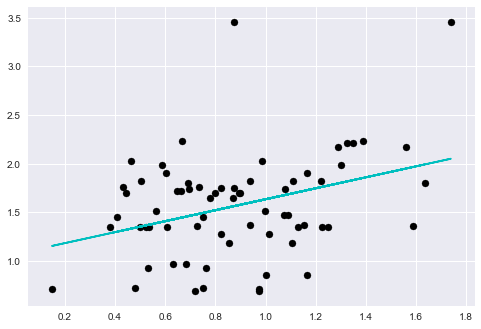

In [61]:
n = 2792
pl.plot(X_orig[genes[n]],c6HUT['pred'][n],c='c')
pl.scatter(X_orig[genes[n]],Y,c='k')
pl.show()

### 6H T

In [75]:
X_orig = train_data[(train_data['Treatment']==1)&(train_data['Timepoint'] == 0)].drop(['DHA_IC50','Sample_Name','Isolate','BioRep'], axis=1)
Y = train_data[(train_data['Treatment']==1)&(train_data['Timepoint'] == 0)][['DHA_IC50']]
X = StandardScaler().fit_transform(X_orig)
X_train, X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.33,random_state=5)

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
Y_pred = linear_model.predict(X_test)

print(linear_model.score(X_train,Y_train))
print(linear_model.score(X_test,Y_test))
print(mean_squared_error(Y_test, Y_pred))

coefs_6HT = []
preds_6HT = []

for g in genes:
    linear_model.fit(X_orig[g].values.reshape(-1, 1), Y)
    preds_6HT.append(linear_model.predict(X_orig[g].values.reshape(-1, 1)))
    coefs_6HT.append(linear_model.coef_[0][0])
    
c6HT = pd.DataFrame(list(zip(genes,coefs_6HT,preds_6HT)),columns =['gene', 'coef','pred'])

pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X)
p6HT = pd.DataFrame(data = principalComponents)

1.0
-0.6085863841165822
0.23981623791229142


#### top:
- 1632 [.58]
- 33
- 3576
- 3725
- 3221

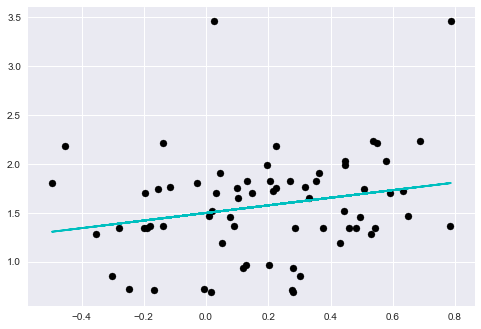

In [63]:
n = 3221
pl.plot(X_orig[genes[n]],c6HT['pred'][n],c='c')
pl.scatter(X_orig[genes[n]],Y,c='k')
pl.show()

### 24H UT

In [76]:
X_orig = train_data[(train_data['Treatment']==0)&(train_data['Timepoint'] == 1)].drop(['DHA_IC50','Sample_Name','Isolate','BioRep'], axis=1)
Y = train_data[(train_data['Treatment']==0)&(train_data['Timepoint'] == 1)][['DHA_IC50']]
X = StandardScaler().fit_transform(X_orig)
X_train, X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.33,random_state=5)

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
Y_pred = linear_model.predict(X_test)

print(linear_model.score(X_train,Y_train))
print(linear_model.score(X_test,Y_test))
print(mean_squared_error(Y_test, Y_pred))

coefs_24HUT = []
preds_24HUT = []

for g in genes:
    linear_model.fit(X_orig[g].values.reshape(-1, 1), Y)
    preds_24HUT.append(linear_model.predict(X_orig[g].values.reshape(-1, 1)))
    coefs_24HUT.append(linear_model.coef_[0][0])
    
c24HUT = pd.DataFrame(list(zip(genes,coefs_24HUT,preds_24HUT)),columns =['gene', 'coef','pred']) 

pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X)
p24HUT = pd.DataFrame(data = principalComponents)

1.0
-1.572742845311328
0.38355758594660033


#### top:
- 2180 [.46]
- 1826
- 2944
- 2430
- 2490

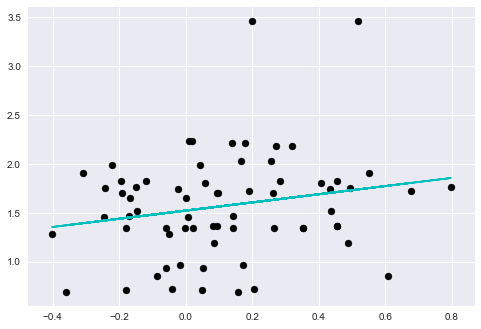

In [65]:
n = 2490
pl.plot(X_orig[genes[n]],c24HUT['pred'][n],c='c')
pl.scatter(X_orig[genes[n]],Y,c='k')
pl.show()

### 24H T

In [77]:
X_orig = train_data[(train_data['Treatment']==1)&(train_data['Timepoint'] == 1)].drop(['DHA_IC50','Sample_Name','Isolate','BioRep'], axis=1)
Y = train_data[(train_data['Treatment']==1)&(train_data['Timepoint'] == 1)][['DHA_IC50']]
X = StandardScaler().fit_transform(X_orig)
X_train, X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.33,random_state=5)

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
Y_pred = linear_model.predict(X_test)

print(linear_model.score(X_train,Y_train))
print(linear_model.score(X_test,Y_test))
print(mean_squared_error(Y_test, Y_pred))

coefs_24HT = []
preds_24HT = []

for g in genes:
    linear_model.fit(X_orig[g].values.reshape(-1, 1), Y)
    preds_24HT.append(linear_model.predict(X_orig[g].values.reshape(-1, 1)))
    coefs_24HT.append(linear_model.coef_[0][0])
    
c24HT = pd.DataFrame(list(zip(genes,coefs_24HT,preds_24HT)),columns =['gene', 'coef','pred']) 

pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X)
p24HT = pd.DataFrame(data = principalComponents)

1.0
-0.9338925618573696
0.28831453709332494


#### top:
- 1102 [.72]
- 1313
- 4865
- 1790
- 3348

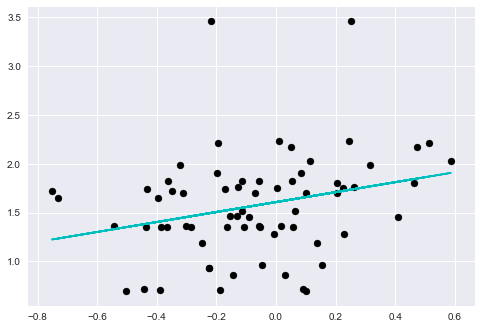

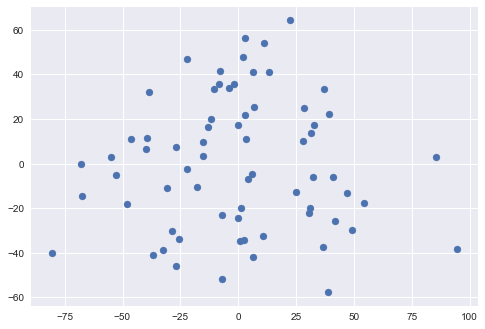

In [79]:
n = 3348
pl.plot(X_orig[genes[n]],c24HT['pred'][n],c='c')
pl.scatter(X_orig[genes[n]],Y,c='k')
pl.show()

pl.scatter(p24HT[0],p24HT[1])
pl.show()

In [47]:
cosine_similarity(c6HT['coef'].values.reshape(1, -1),c24HT['coef'].values.reshape(1, -1))

array([[-0.46892459]])

In [48]:
cosine_similarity(c6HUT['coef'].values.reshape(1, -1),c24HUT['coef'].values.reshape(1, -1))

array([[-0.36203758]])

In [49]:
cosine_similarity(c6HUT['coef'].values.reshape(1, -1),c6HT['coef'].values.reshape(1, -1))

array([[-0.53274932]])

In [50]:
cosine_similarity(c24HUT['coef'].values.reshape(1, -1),c24HT['coef'].values.reshape(1, -1))

array([[-0.42138384]])

In [53]:
c6HT.sort_values(by='coef').tail(20)

,gene,coef,pred
2159,PF3D7_0826300,0.333483,"[[1.644057615999562], [1.523409599747339], [1...."
1867,PF3D7_0729100,0.334608,"[[1.5891068993290929], [1.5495236639270895], [..."
5484,PF3D7_1474400,0.338138,"[[1.58254748115657], [1.48010677858842], [1.51..."
4909,PF3D7_1416200,0.343331,"[[1.6160355299560156], [1.638253656671445], [1..."
3699,PF3D7_1221000,0.348171,"[[1.5521417584445865], [1.6050727667722153], [..."
4417,PF3D7_1338900,0.351163,"[[1.8504348165059714], [1.5872355822645061], [..."
2787,PF3D7_1018300,0.353094,"[[1.4615675401654151], [1.6306862436579987], [..."
4473,PF3D7_1344600,0.358490,"[[1.5177365607568774], [1.5957175402077992], [..."
5171,PF3D7_1443100,0.366210,"[[1.5833104221054055], [1.623009642332914], [1..."
496,PF3D7_0303000,0.366267,"[[1.398293485811256], [1.6630057930144853], [1..."


In [54]:
c24HT.sort_values(by='coef').tail(20)

,gene,coef,pred
739,PF3D7_0403400,0.383257,"[[1.41969516542392], [1.480029397795924], [1.6..."
1778,PF3D7_0719800,0.384612,"[[1.8099658784341077], [1.359754471786699], [1..."
1625,PF3D7_0703700,0.388255,"[[1.666150453552195], [1.4162333267955654], [1..."
5471,PF3D7_1473100,0.388276,"[[1.4594677839509025], [1.5481411268765923], [..."
4113,PF3D7_1308400,0.397250,"[[1.5774142602534416], [1.4554482620810483], [..."
3722,PF3D7_1223300,0.402355,"[[1.5452560776860869], [1.5228283417426955], [..."
1831,PF3D7_0725100,0.402740,"[[1.568932050597253], [1.5682979773916148], [1..."
325,PF3D7_0208400,0.407677,"[[1.6010773506112121], [1.540430713608563], [1..."
2333,PF3D7_0910500,0.408772,"[[1.447381170130918], [1.551750211315965], [1...."
3789,PF3D7_1230000,0.416443,"[[1.5059884108814419], [1.616870043189915], [1..."


### Drop out by variance in BioRep

In [177]:
X_orig = train_data[(train_data['Treatment']==1)&(train_data['Timepoint'] == 1)].drop(['DHA_IC50','Sample_Name','Isolate'], axis=1)
Y = train_data[(train_data['Treatment']==1)&(train_data['Timepoint'] == 1)][['DHA_IC50']]

reps1 = X_orig[(X_orig['BioRep'] == 1)]
reps2 = X_orig[(X_orig['BioRep'] == 2)]

names = []

drop_point = 0.275

for i in range(len(genes)):
    if np.mean(abs(reps2.values[:,i+3] - reps1.values[:,i+3]))/abs(np.max([reps1.values[:,i+3],reps2.values[:,i+3]])) > drop_point:
        names.append(genes[i])
    
X_new = X_orig.drop(names,axis=1)
#X_new.describe()

In [167]:
X_orig = train_data[(train_data['Treatment']==1)&(train_data['Timepoint'] == 1)].drop(['DHA_IC50','Sample_Name','Isolate'], axis=1)
Y = train_data[(train_data['Treatment']==1)&(train_data['Timepoint'] == 1)][['DHA_IC50']]

reps1 = X_orig[(X_orig['BioRep'] == 1)]
reps2 = X_orig[(X_orig['BioRep'] == 2)]

threshold = []
accuracy = []
mse = []
spearman = []
num_cols = []

for j in np.arange(0.25,0.75,0.025):
    drop_point = j
    names = []
    for i in range(len(genes)):
        if np.mean(abs(reps2.values[:,i+3] - reps1.values[:,i+3]))/abs(np.max([reps1.values[:,i+3],reps2.values[:,i+3]])) > drop_point:
            names.append(genes[i])
    
    X_new = X_orig.drop(names,axis=1)
    
    X = StandardScaler().fit_transform(X_new)
    X_train, X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.33,random_state=33)

    linear_model = LinearRegression()
    linear_model.fit(X_train, Y_train)
    Y_pred = linear_model.predict(X_test)
    
    threshold.append(j)
    accuracy.append(linear_model.score(X_test,Y_test))
    mse.append(mean_squared_error(Y_test, Y_pred))
    spearman.append(spearmanr(Y_test,Y_pred)[0])
    num_cols.append(len(X_new.columns))

results = pd.DataFrame(list(zip(threshold,accuracy,mse,spearman,num_cols)),columns =['threshold', 'accuracy','mse','spearman','num_cols']) 


### cosine similarity

In [206]:
X_orig = train_data[(train_data['Treatment']==1)&(train_data['Timepoint'] == 1)].drop(['DHA_IC50','Sample_Name','Isolate'], axis=1)
Y = train_data[(train_data['Treatment']==1)&(train_data['Timepoint'] == 1)][['DHA_IC50']]

reps1 = X_orig[(X_orig['BioRep'] == 1)]
reps2 = X_orig[(X_orig['BioRep'] == 2)]

names = []

for i in range(len(genes)):
    if cosine_similarity(reps2.values[:,i+3].reshape(1, -1),reps1.values[:,i+3].reshape(1, -1))[0][0] < 0.65:
        names.append(genes[i])
    
X_new = X_orig.drop(names,axis=1)
print(len(X_new.columns))

1063


In [211]:
X_orig = train_data[(train_data['Treatment']==1)&(train_data['Timepoint'] == 1)].drop(['DHA_IC50','Sample_Name','Isolate'], axis=1)
Y = train_data[(train_data['Treatment']==1)&(train_data['Timepoint'] == 1)][['DHA_IC50']]

reps1 = X_orig[(X_orig['BioRep'] == 1)]
reps2 = X_orig[(X_orig['BioRep'] == 2)]

threshold = []
accuracy = []
mse = []
spearman = []
num_cols = []

for j in np.arange(-0.2,0.95,0.05):
    drop_point = j
    names = []

    for i in range(len(genes)):
        if cosine_similarity(reps2.values[:,i+3].reshape(1, -1),reps1.values[:,i+3].reshape(1, -1))[0][0] < drop_point:
            names.append(genes[i])
    
    X_new = X_orig.drop(names,axis=1)
    
    X = StandardScaler().fit_transform(X_new)
    X_train, X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.33,random_state=33)

    linear_model = LinearRegression()
    linear_model.fit(X_train, Y_train)
    Y_pred = linear_model.predict(X_test)
    
    threshold.append(j)
    accuracy.append(linear_model.score(X_test,Y_test))
    mse.append(mean_squared_error(Y_test, Y_pred))
    spearman.append(spearmanr(Y_test,Y_pred)[0])
    num_cols.append(len(X_new.columns))

results = pd.DataFrame(list(zip(threshold,accuracy,mse,spearman,num_cols)),columns =['threshold', 'accuracy','mse','spearman','num_cols']) 


In [212]:
results

,threshold,accuracy,mse,spearman,num_cols
0,-2.000000e-01,-0.396529,0.231484,0.340269,5358
1,-1.500000e-01,-0.375412,0.227983,0.345717,5235
2,-1.000000e-01,-0.372073,0.227430,0.342745,5068
3,-5.000000e-02,-0.414701,0.234496,0.316494,4840
4,-5.551115e-17,-0.417056,0.234886,0.316494,4600
5,5.000000e-02,-0.400204,0.232093,0.329867,4292
6,1.000000e-01,-0.417629,0.234981,0.327391,4004
7,1.500000e-01,-0.352906,0.224253,0.327391,3679
8,2.000000e-01,-0.364319,0.226145,0.327391,3374
9,2.500000e-01,-0.395420,0.231300,0.311046,3081


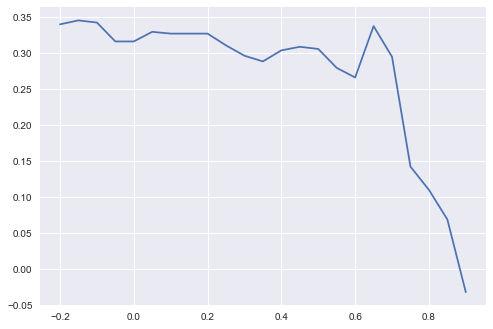

In [213]:
pl.plot(results['threshold'],results['spearman'])
pl.show()

### Drop out by standard deviation
- does not work

In [156]:
sel = VarianceThreshold(threshold=0.2)
X_new_2 = pd.DataFrame(data = sel.fit_transform(X_orig))
X_new_2.describe()

,0,1,2,3,4,5,6,7,8,9,...,2933,2934,2935,2936,2937,2938,2939,2940,2941,2942
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,...,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,0.124966,-1.461960,-1.165256,-0.892169,-0.339326,1.490583,-0.157890,1.463938,0.175995,-1.090927,...,-0.148574,0.195101,-3.934662,-1.118589,-1.988966,-5.074491,-2.246840,-1.742070,-4.406114,-1.700418
std,0.489490,0.578648,0.698850,0.467435,0.959714,0.883947,0.930359,0.682259,0.498364,0.596917,...,0.617696,0.962422,1.790821,0.927749,0.455575,1.141083,1.065408,0.669586,0.802256,0.781295
min,-0.872028,-2.535058,-2.791146,-1.671742,-2.045447,-0.340798,-2.179001,-0.133621,-0.790220,-2.666306,...,-1.793459,-2.422761,-8.822660,-3.097147,-2.818718,-7.721518,-3.984077,-3.085924,-5.898636,-2.963402
25%,-0.194285,-1.806952,-1.692028,-1.241179,-1.133442,0.939239,-0.925101,0.957848,-0.153973,-1.490777,...,-0.562246,-0.437984,-4.815264,-1.756867,-2.290404,-5.836316,-3.106130,-2.146527,-5.100425,-2.215965
50%,0.170333,-1.500413,-1.228841,-0.936393,-0.479856,1.541274,0.023846,1.421651,0.219822,-1.106992,...,-0.108361,0.275792,-3.939494,-1.172346,-2.054764,-5.419368,-2.500824,-1.801344,-4.397363,-1.751884
75%,0.422679,-1.163744,-0.717370,-0.621804,0.459174,2.138837,0.499613,1.905730,0.543966,-0.776909,...,0.327826,0.709578,-2.761783,-0.478490,-1.689671,-4.111546,-1.397315,-1.288726,-3.917326,-1.341306
max,1.337421,0.893645,0.477583,0.767819,1.517410,3.363307,2.127988,2.880881,1.285910,0.480669,...,1.213397,2.392878,-0.486845,1.399163,-0.808287,-2.619335,0.372650,-0.060964,-2.707209,1.015633


### Univariate

In [146]:
X_new_3 = GenericUnivariateSelect(f_classif,'percentile', param=50).fit_transform(X_new_2, Y)
X_new_3 = pd.DataFrame(data = sel.fit_transform(X_new_3),columns=genes)
X_new_3.describe()

/Users/shasha/miniconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Shape of passed values is (383, 68), indices imply (5540, 68)

In [155]:
#X_orig = train_data[(train_data['Treatment']==1)&(train_data['Timepoint'] == 1)].drop(['DHA_IC50','Sample_Name','Isolate','BioRep'], axis=1)
Y = train_data[(train_data['Treatment']==1)&(train_data['Timepoint'] == 1)][['DHA_IC50']]
X = StandardScaler().fit_transform(X_new)
X_train, X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.33,random_state=5)

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
Y_pred = linear_model.predict(X_test)

print(linear_model.score(X_train,Y_train))
print(linear_model.score(X_test,Y_test))
print(mean_squared_error(Y_test, Y_pred))
print(spearmanr(Y_test,Y_pred))


1.0
-0.5612962687811169
0.23276598704471496
SpearmanrResult(correlation=0.1755529127305103, pvalue=0.423002832911078)


In [154]:
X_orig = train_data[(train_data['Treatment']==1)&(train_data['Timepoint'] == 1)].drop(['DHA_IC50','Sample_Name','Isolate','BioRep'], axis=1)
Y = train_data[(train_data['Treatment']==1)&(train_data['Timepoint'] == 1)][['DHA_IC50']]
X = StandardScaler().fit_transform(X_orig)
X_train, X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.33,random_state=5)

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
Y_pred = linear_model.predict(X_test)

print(linear_model.score(X_train,Y_train))
print(linear_model.score(X_test,Y_test))
print(mean_squared_error(Y_test, Y_pred))
print(spearmanr(Y_test,Y_pred))


1.0
-0.9338925618573696
0.28831453709332494
SpearmanrResult(correlation=0.06893179341678231, pvalue=0.7546441591149724)


In [157]:
#X_orig = train_data[(train_data['Treatment']==1)&(train_data['Timepoint'] == 1)].drop(['DHA_IC50','Sample_Name','Isolate','BioRep'], axis=1)
Y = train_data[(train_data['Treatment']==1)&(train_data['Timepoint'] == 1)][['DHA_IC50']]
X = StandardScaler().fit_transform(X_new_2)
X_train, X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.33,random_state=5)

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
Y_pred = linear_model.predict(X_test)

print(linear_model.score(X_train,Y_train))
print(linear_model.score(X_test,Y_test))
print(mean_squared_error(Y_test, Y_pred))
print(spearmanr(Y_test,Y_pred))

1.0
-1.3450941613780873
0.34961856253721324
SpearmanrResult(correlation=0.03025064315412749, pvalue=0.891017013863644)


In [168]:
results

,threshold,accuracy,mse,spearman,num_cols
0,0.250,-1.444992,0.405273,0.163943,241
1,0.275,-0.397975,0.231723,0.298664,457
2,0.300,-0.400893,0.232207,0.350670,702
3,0.325,-0.469331,0.243551,0.303617,987
4,0.350,-0.409298,0.233600,0.323428,1316
5,0.375,-0.277597,0.211770,0.287272,1660
6,0.400,-0.318100,0.218484,0.308570,1947
7,0.425,-0.359952,0.225421,0.327886,2278
8,0.450,-0.338446,0.221856,0.331848,2548
9,0.475,-0.345544,0.223032,0.346212,2837


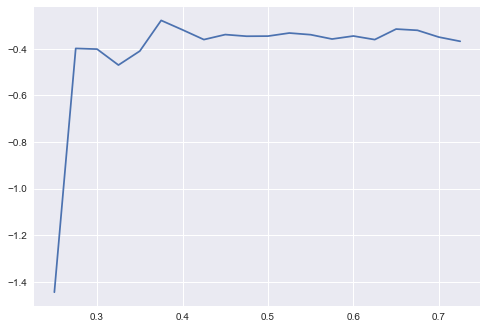

In [172]:
pl.plot(results['threshold'],results['accuracy'])
#pl.ylim(-1,0)
pl.show()

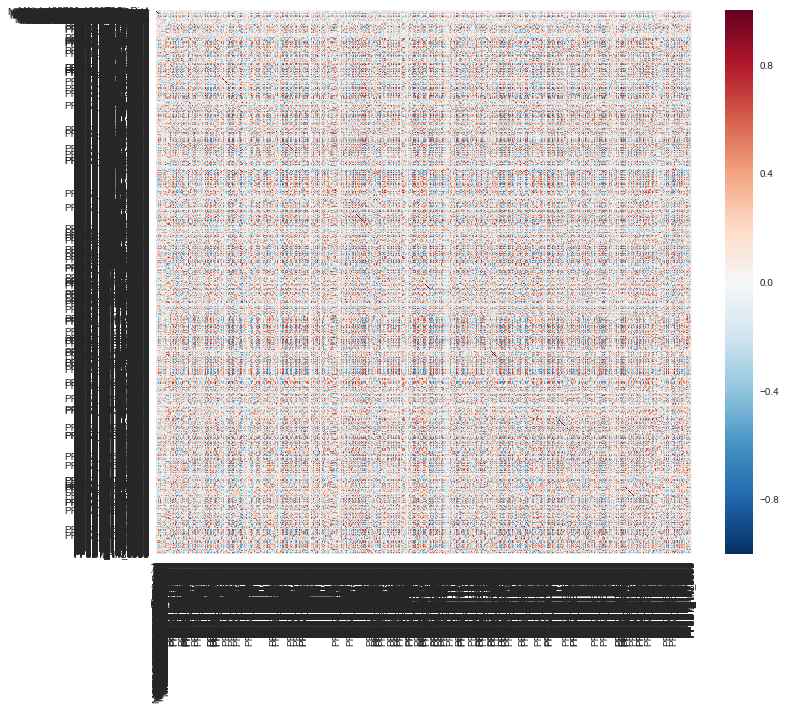

In [175]:
pl.figure(figsize=(12,10))
cor = train_data.corr()
sns.heatmap(cor, annot=False)
pl.show()

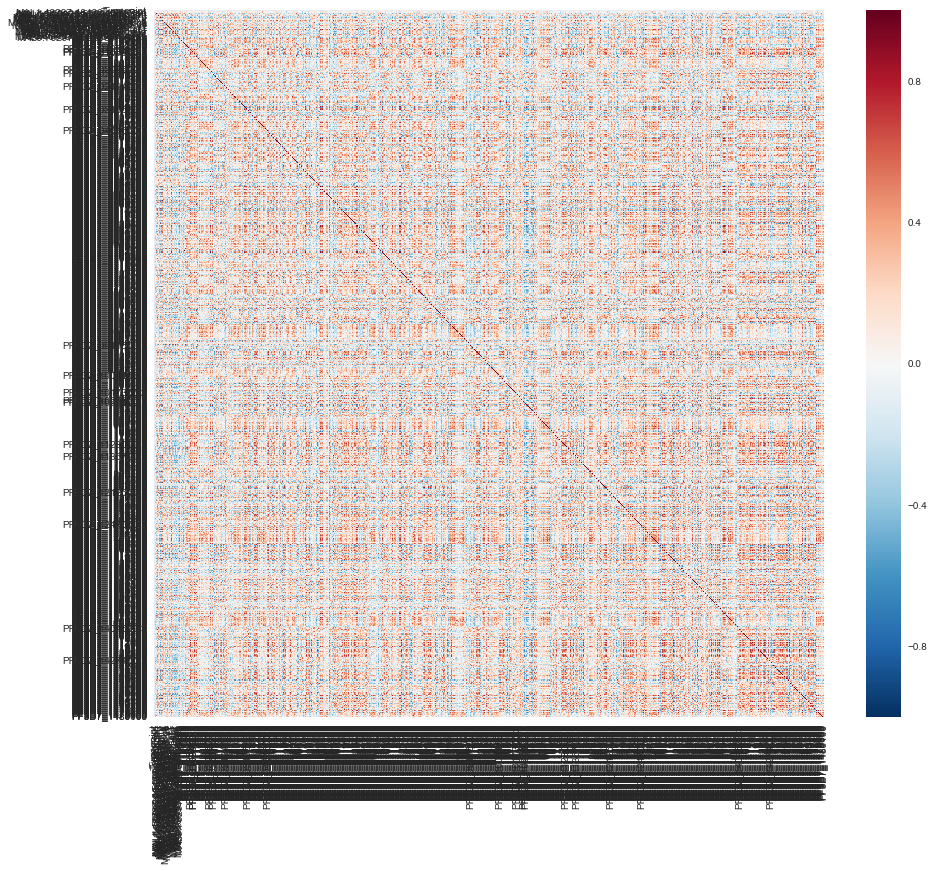

In [207]:
pl.figure(figsize=(15,13))
cor_s = X_new.corr(method='spearman')
sns.heatmap(cor_s, annot=False)
pl.show()

In [188]:
sub = train_data[(train_data['Timepoint'] == 1) & (train_data['Treatment'] == 1)]
cor_sub = sub.corr()
cor_sub_s = sub.corr(method='spearman')

In [268]:
#cor_target = abs(cor_sub["DHA_IC50"])
#relevant_features = cor_target[cor_target>0.3]
to_drop = list(cor_sub[abs(cor_sub['DHA_IC50'])<0.3].index)
X_new_4 = sub
X_new_4.drop(to_drop,axis=1)
 
X_new_4.describe()

,Timepoint,Treatment,BioRep,MAL1.465720.465873.bc..rv..,MAL1.48287.48430....kr...can,MAL1.562126.562246.bc..r...,MAL1.59416.59687....kr...can,MAL1.616633.616682.......y.,MAL10.1139073.1139243....kr,MAL10.258733.258825.b...r..,...,PF3D7_1479200,PF3D7_1479400,PF3D7_1479500,PF3D7_1479600,PF3D7_1479700,PF3D7_1479800,PF3D7_1479900,PF3D7_1480000,PF3D7_1480100,DHA_IC50
count,68.0,68.0,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,...,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,1.0,1.0,1.911765,0.124966,-1.461960,-1.165256,-0.892169,-0.339326,0.246474,1.490583,...,0.195101,-3.934662,-1.118589,-1.988966,-5.074491,-2.246840,-1.742070,-4.406114,-1.700418,1.570315
std,0.0,0.0,1.368465,0.489490,0.578648,0.698850,0.467435,0.959714,0.440962,0.883947,...,0.962422,1.790821,0.927749,0.455575,1.141083,1.065408,0.669586,0.802256,0.781295,0.537390
min,1.0,1.0,1.000000,-0.872028,-2.535058,-2.791146,-1.671742,-2.045447,-0.613892,-0.340798,...,-2.422761,-8.822660,-3.097147,-2.818718,-7.721518,-3.984077,-3.085924,-5.898636,-2.963402,0.693300
25%,1.0,1.0,1.000000,-0.194285,-1.806952,-1.692028,-1.241179,-1.133442,-0.124753,0.939239,...,-0.437984,-4.815264,-1.756867,-2.290404,-5.836316,-3.106130,-2.146527,-5.100425,-2.215965,1.348000
50%,1.0,1.0,2.000000,0.170333,-1.500413,-1.228841,-0.936393,-0.479856,0.303625,1.541274,...,0.275792,-3.939494,-1.172346,-2.054764,-5.419368,-2.500824,-1.801344,-4.397363,-1.751884,1.582000
75%,1.0,1.0,2.000000,0.422679,-1.163744,-0.717370,-0.621804,0.459174,0.518788,2.138837,...,0.709578,-2.761783,-0.478490,-1.689671,-4.111546,-1.397315,-1.288726,-3.917326,-1.341306,1.820000
max,1.0,1.0,8.000000,1.337421,0.893645,0.477583,0.767819,1.517410,1.371144,3.363307,...,2.392878,-0.486845,1.399163,-0.808287,-2.619335,0.372650,-0.060964,-2.707209,1.015633,3.460000


In [266]:
sub

,Sample_Name,Isolate,Timepoint,Treatment,BioRep,MAL1.465720.465873.bc..rv..,MAL1.48287.48430....kr...can,MAL1.562126.562246.bc..r...,MAL1.59416.59687....kr...can,MAL1.616633.616682.......y.,...,PF3D7_1479200,PF3D7_1479400,PF3D7_1479500,PF3D7_1479600,PF3D7_1479700,PF3D7_1479800,PF3D7_1479900,PF3D7_1480000,PF3D7_1480100,DHA_IC50
0,isolate_01.24HR.DHA.BRep1,isolate_01,1,1,1,0.008286,-0.959492,0.206468,-0.443936,0.453030,...,-0.540993,-3.674097,-1.652979,-2.255490,-4.554757,-0.381422,-1.415857,-4.121011,-2.486528,2.1770
1,isolate_01.24HR.DHA.BRep2,isolate_01,1,1,2,-0.872028,-1.968558,-2.308563,-1.186611,0.508575,...,0.450649,-4.464408,-0.977954,-2.012559,-4.538550,-2.333890,-2.342496,-4.774197,-1.794568,2.1770
8,isolate_02.24HR.DHA.BRep1,isolate_02,1,1,1,-0.178971,-1.922426,-1.875015,-1.484605,-0.233600,...,0.024133,-2.215227,-1.957654,-2.188635,-4.424748,-2.986927,-1.722201,-3.995680,-0.902979,1.6970
9,isolate_02.24HR.DHA.BRep2,isolate_02,1,1,2,1.337421,-1.764941,-0.414673,-0.686910,0.291468,...,0.806314,-3.733712,-1.990368,-1.633418,-5.533077,-3.283316,-2.104227,-5.767710,-2.177930,1.6970
10,isolate_02.24HR.DHA.BRep3,isolate_02,1,1,3,-0.717441,-1.151982,-1.693989,-1.337437,0.081134,...,0.115002,-1.305902,-0.679212,-2.099512,-5.955507,-0.920594,-1.626372,-4.422711,-1.408485,1.6970
11,isolate_02.24HR.DHA.BRep4,isolate_02,1,1,4,0.143501,-1.496923,-1.219010,-1.144765,0.689356,...,1.113241,-4.016287,-1.327287,-2.375500,-4.379304,-2.752906,-1.939162,-3.500963,-0.796143,1.6970
24,isolate_03.24HR.DHA.BRep1,isolate_03,1,1,1,-0.373972,-1.083108,-0.578892,-1.199577,1.304293,...,-2.016912,-4.682891,-0.254524,-2.668047,-6.573239,-3.264155,-0.671344,-5.312867,-2.248219,1.7990
25,isolate_03.24HR.DHA.BRep2,isolate_03,1,1,2,0.166098,-1.600858,-0.444542,-1.460192,-1.444799,...,-0.116719,-4.535173,-0.537190,-2.472669,-6.261742,-3.134708,-1.969545,-5.157691,-2.637917,1.7990
32,isolate_04.24HR.DHA.BRep1,isolate_04,1,1,1,-0.192373,-1.887639,-1.238673,-1.233932,-1.386699,...,0.125283,-5.360958,-2.386122,-1.886257,-6.127057,-3.231487,-2.349583,-4.977880,-1.047555,0.7100
33,isolate_04.24HR.DHA.BRep2,isolate_04,1,1,2,-0.485227,-0.087643,-1.893473,-0.940007,-0.571768,...,-1.032989,-8.298501,-0.080207,-2.335635,-4.606785,-2.849864,-2.028372,-3.179649,-2.205214,0.7100


In [ ]:
pl.figure(figsize=(12,10))
cor = train_data.corr()
sns.heatmap(cor, annot=False)
pl.show()

In [186]:
cor_target = abs(cor_s["DHA_IC50"])
relevant_features = cor_target[cor_target>0.1]
relevant_features

KeyError: 'DHA_IC50'

In [185]:
cor_target = abs(cor["DHA_IC50"])
relevant_features = cor_target[cor_target>0.1]
relevant_features

MAL1.59416.59687....kr...can    0.101687
MAL11.228710.228826.b.gk...     0.106365
MAL13.2801236.2801354...gk      0.135570
MAL6.983863.983946.....r..      0.117087
PF3D7_0108200                   0.152791
PF3D7_0201500                   0.130164
PF3D7_0201600                   0.138929
PF3D7_0201800                   0.106637
PF3D7_0201900                   0.122566
PF3D7_0220500                   0.102859
PF3D7_0221800                   0.113791
PF3D7_0317600                   0.100598
PF3D7_0412700                   0.112633
PF3D7_0421200                   0.118192
PF3D7_0521600                   0.132004
PF3D7_0523200                   0.129189
PF3D7_0602300                   0.110534
PF3D7_0622400                   0.110271
PF3D7_0701800                   0.111279
PF3D7_0718200                   0.111487
PF3D7_0822300                   0.103558
PF3D7_0830700                   0.129484
PF3D7_0832200.1                 0.134475
PF3D7_0832300                   0.106119
PF3D7_0833100   

In [227]:
cor_sub.head()

,Timepoint,Treatment,BioRep,MAL1.465720.465873.bc..rv..,MAL1.48287.48430....kr...can,MAL1.562126.562246.bc..r...,MAL1.59416.59687....kr...can,MAL1.616633.616682.......y.,MAL10.1139073.1139243....kr,MAL10.258733.258825.b...r..,...,PF3D7_1479200,PF3D7_1479400,PF3D7_1479500,PF3D7_1479600,PF3D7_1479700,PF3D7_1479800,PF3D7_1479900,PF3D7_1480000,PF3D7_1480100,DHA_IC50
Timepoint,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Treatment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BioRep,NaN,NaN,1.000000,0.151971,0.045703,0.082362,0.091435,0.021941,-0.013131,0.031626,...,0.151184,0.046712,0.131544,0.163636,0.231428,0.016868,0.063561,0.152820,0.127756,-0.098004
MAL1.465720.465873.bc..rv..,NaN,NaN,0.151971,1.000000,-0.121409,0.182189,-0.123299,-0.302956,0.058899,0.176539,...,0.071094,-0.064283,-0.047458,0.151833,0.268616,0.127729,0.021428,-0.116343,-0.070125,0.008094
MAL1.48287.48430....kr...can,NaN,NaN,0.045703,-0.121409,1.000000,0.240696,0.392230,0.240592,0.149237,-0.345307,...,-0.159149,-0.283770,0.227402,0.028648,0.304185,0.178560,0.259605,0.378557,0.095778,-0.300842


In [255]:
genes

['MAL1.465720.465873.bc..rv..',
 'MAL1.48287.48430....kr...can',
 'MAL1.562126.562246.bc..r...',
 'MAL1.59416.59687....kr...can',
 'MAL1.616633.616682.......y.',
 'MAL10.1139073.1139243....kr',
 'MAL10.258733.258825.b...r..',
 'MAL10.271753.271892.bcgkrvy',
 'MAL10.273174.273239.....r..',
 'MAL10.416036.416142...g....',
 'MAL10.947605.947888.b..kr..',
 'MAL11.1116008.1116068.....r',
 'MAL11.1839112.1839193....k.',
 'MAL11.228710.228826.b.gk...',
 'MAL11.390127.390200..cg...y',
 'MAL11.42992.43250.bc.kr...c',
 'MAL11.557615.557686.....r..',
 'MAL11.804991.805237..c..r..',
 'MAL12.1252815.1253072.bcg.',
 'MAL12.1297315.1297410.....',
 'MAL12.1516930.1517011....k',
 'MAL12.1518573.1518702.b..k',
 'MAL12.161842.161903....kr.',
 'MAL12.1715356.1715487.b..k',
 'MAL12.1745293.1745457.....',
 'MAL12.354467.354531.......',
 'MAL12.659493.659644..c.kr.',
 'MAL13.1042932.1042987....k',
 'MAL13.1213708.1213907.bcgk',
 'MAL13.1349736.1349797...gk',
 'MAL13.1676588.1676677.....',
 'MAL13.243882.2440

In [261]:
list(to_drop)

['MAL1.48287.48430....kr...can',
 'PF3D7_0108400.1',
 'PF3D7_0500600',
 'PF3D7_0515100',
 'PF3D7_0515500',
 'PF3D7_0522900',
 'PF3D7_0703700',
 'PF3D7_0732800',
 'PF3D7_0816300',
 'PF3D7_0901200',
 'PF3D7_1341900',
 'PF3D7_1411800',
 'PF3D7_1428400',
 'PF3D7_1444200',
 'PF3D7_1477900',
 'DHA_IC50']

In [264]:
to_drop

['MAL1.48287.48430....kr...can',
 'PF3D7_0108400.1',
 'PF3D7_0500600',
 'PF3D7_0515100',
 'PF3D7_0515500',
 'PF3D7_0522900',
 'PF3D7_0703700',
 'PF3D7_0732800',
 'PF3D7_0816300',
 'PF3D7_0901200',
 'PF3D7_1341900',
 'PF3D7_1411800',
 'PF3D7_1428400',
 'PF3D7_1444200',
 'PF3D7_1477900',
 'DHA_IC50']